In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

In [74]:
def make_stock_plot(path, ticker_symbol):
    """
    This is a docstring
    probably delete this b/c we have the other function now
    """
    df = pd.read_csv(path)
    x = df['timestamp']
    y = df['close']
    
    x = [dt.datetime.strptime(str(val)[0:10],'%Y-%m-%d').date() for val in x]

    print(x[0:5])

    plt.figure(facecolor="white")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title(f"{ticker_symbol}")

    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_tick_params(rotation = 30)
    plt.plot(x,y)
    plt.gcf().autofmt_xdate()
    plt.show()


[datetime.date(2021, 9, 1), datetime.date(2021, 9, 2), datetime.date(2021, 9, 3), datetime.date(2021, 9, 7), datetime.date(2021, 9, 8)]


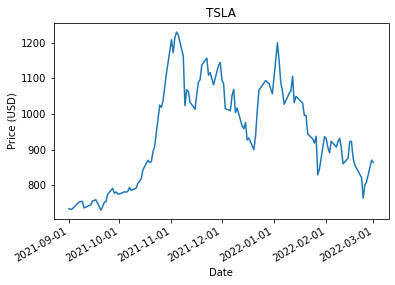

In [73]:
make_stock_plot("../stock_info/TSLAdata.csv", "TSLA")

In [114]:
def days_since_epoch(date):
    """
    This is a docstring
    """
    return (date - dt.date(1970,1,1)).days


def date_from_epoch_time(num_days):
    """
    This is a docstring
    """
    return (dt.date(1970,1,1) + dt.timedelta(num_days))


In [117]:
def make_color_plot(path, ticker_symbol):
    """
    This is a docstring
    """
    # Read data from file
    df = pd.read_csv(path)
    dateX = df['timestamp']

    # Cast to list to use insert function later
    y = list(df['close'])

    # Convert timestamps to date objects
    dateX = [dt.datetime.strptime(str(val)[0:10],'%Y-%m-%d').date() for val in dateX]

    epoch_offset = days_since_epoch(dateX[0])

    days_covered = (dateX[len(dateX)-1] - dateX[0]).days

    # Adds data points for weekends where stock prices remain constant
    # but time continues.
    for i in range(days_covered - 1):
        if (days_since_epoch(dateX[i]) != days_since_epoch(dateX[i+1]) - 1):
            dateX.insert(i + 1, date_from_epoch_time(days_since_epoch(dateX[i]) + 1))
            y.insert(i + 1, y[i])

    # Make a copy of intX that is integers not date objects
    intX = np.linspace(epoch_offset, epoch_offset + days_covered, len(dateX))
    
    # Get the first derivative of our data to use when 
    # determining the color of the line segment
    z = np.diff(y)

    # Create colormapping arguments
    cmap = ListedColormap(['r', 'g'])
    norm = BoundaryNorm([-1, 0], cmap.N)

    points = np.array([intX, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(z)
    lc.set_linewidth(2)

    # Make the background of the graph white so we can read text
    # in dark mode. Must be first. 
    plt.figure(facecolor="white")

    # Add the colored line segments to the graph
    plt.gca().add_collection(lc)

    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title(f"{ticker_symbol}")
    plt.plot(dateX,y, ".", color = 'black', markersize = 1)
    plt.show()

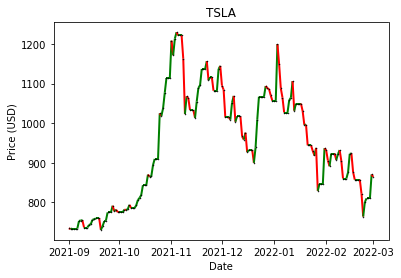

In [118]:
make_color_plot("../stock_info/TSLAdata.csv", "TSLA")